# 基础CNN网络

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-beta0


## 构造数据

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


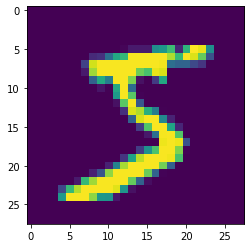

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(x_train[0])
plt.show()

In [4]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

## 构造网络

In [5]:
model = keras.Sequential()

### 卷积层

In [6]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))

### 池化层

In [7]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

### 全连接层

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))

# 分类层
model.add(layers.Dense(10, activation='softmax'))

## 模型配置

In [9]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


## 模型训练

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

W0907 19:17:00.626788 10736 deprecation.py:323] From C:\Users\44310\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 3s 63us/sample - loss: 4.3021 - accuracy: 0.6973 - val_loss: 0.1129 - val_accuracy: 0.9687
Epoch 2/5
54000/54000 [==============================] - 2s 32us/sample - loss: 0.1046 - accuracy: 0.9714 - val_loss: 0.0814 - val_accuracy: 0.9780
Epoch 3/5
54000/54000 [==============================] - 2s 31us/sample - loss: 0.0603 - accuracy: 0.9822 - val_loss: 0.0791 - val_accuracy: 0.9792
Epoch 4/5
54000/54000 [==============================] - 2s 31us/sample - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0899 - val_accuracy: 0.9768
Epoch 5/5
54000/54000 [==============================] - 2s 31us/sample - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0767 - val_accuracy: 0.9800


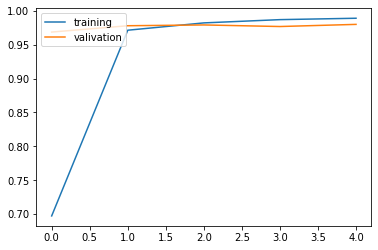

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [12]:
res = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0835 - accuracy: 0.9777
